In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

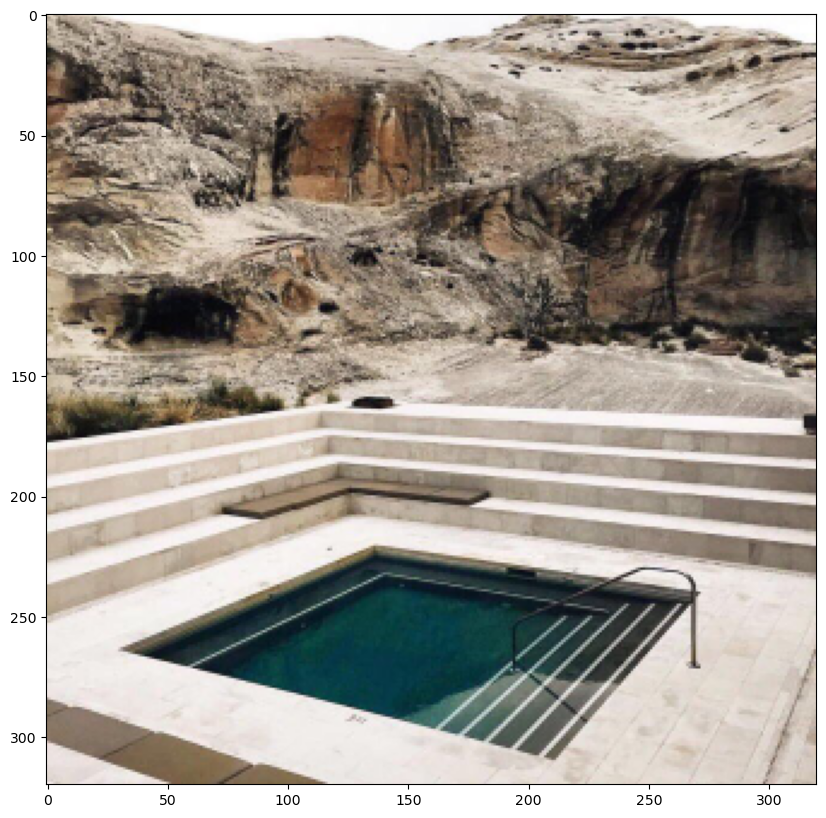

In [2]:
# Load image
img = cv2.imread('desktop/photo2.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, None, fx=0.5, fy=0.5)
# Plot it
plt.imshow(img)

In [3]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

(<AxesSubplot: title={'center': 'Quantized image'}>,
 Text(0.5, 1.0, 'Quantized image'))

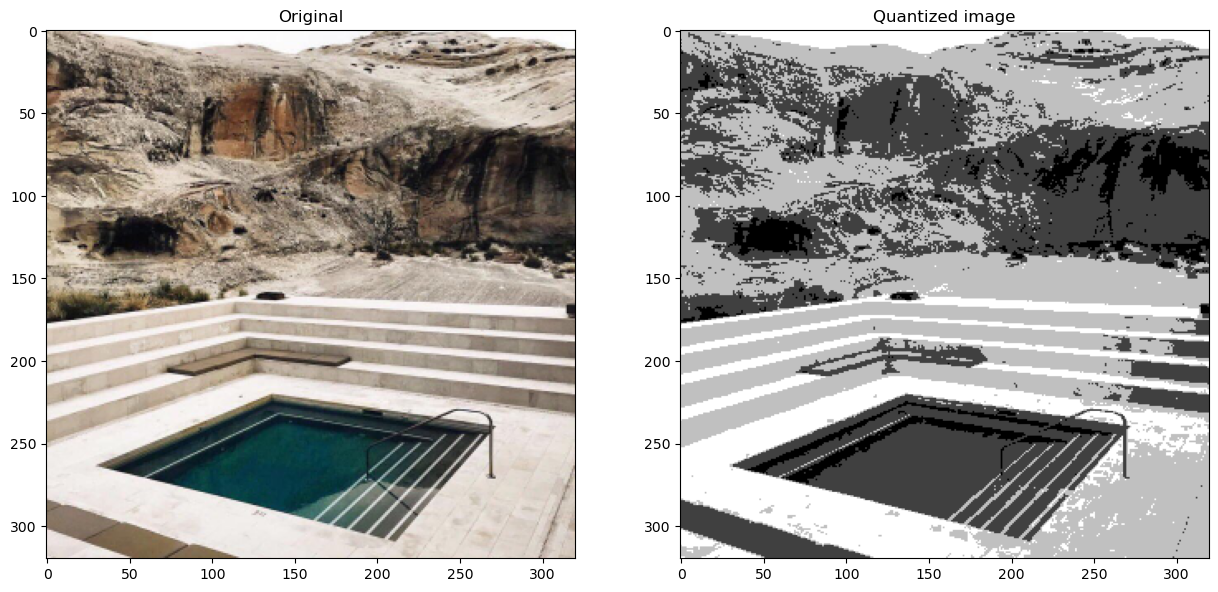

In [4]:
# Cast the image to float
img = img.astype(np.float32)

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = img[r, c, :]
        
        distance = np.linalg.norm(colors - pixel, axis=1)
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin(distance), :]
        
        
        # Apply quantization
        quantized[r, c, :] = new_pixel
        
                     
# Show quantized image (don't forget to cast back to uint8)
img = np.clip(img, 0, 255).astype(np.uint8)
quantized = np.clip(quantized, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(quantized), plt.title('Quantized image')
       

In [5]:
print("image props: "+str(img.shape))

image props: (320, 320, 3)


In [10]:
# Compute average quantization error
avg_quant_error = np.mean(img - quantized)
print(avg_quant_error)

-1.982998


In [7]:
def find_closest_palette_color(pixel, colors):
    new_pixel = np.copy(pixel)
    min_distance = 1e6
    for i in range(len(colors)):
        distance = np.linalg.norm(pixel - colors, axis=1)
        new_pixel = colors[np.argmin(distance), :]
        
        return new_pixel

(<AxesSubplot: title={'center': 'Dithering'}>,
 Text(0.5, 1.0, 'Dithering'))

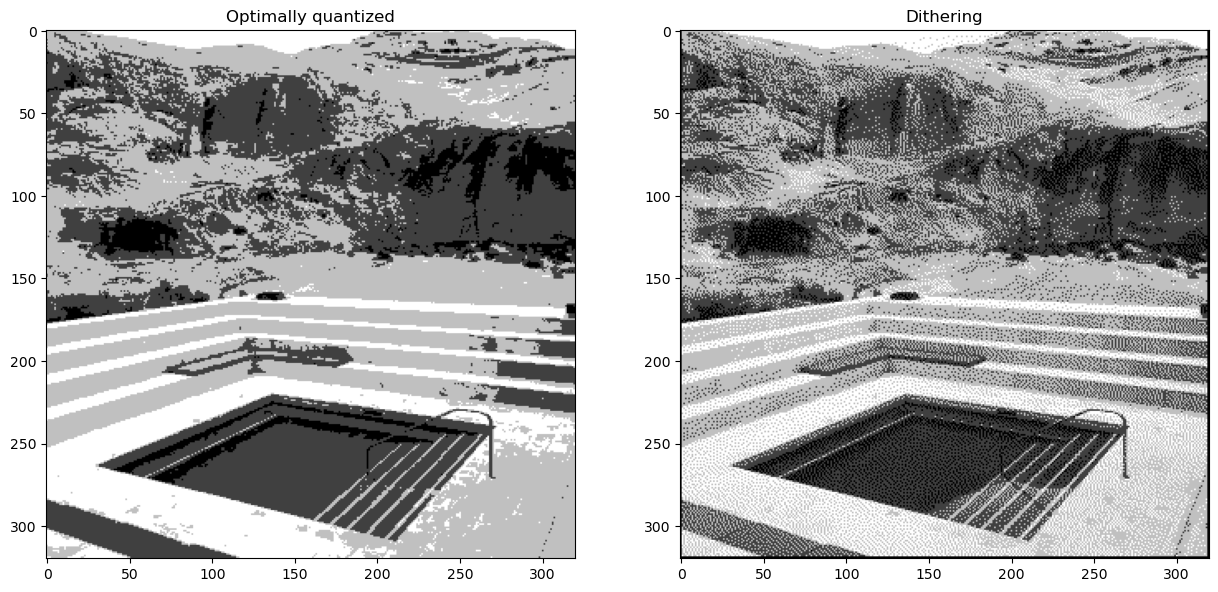

In [8]:
# Cast the image to float
img = img.astype(np.float32)

# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)

#Prepare for quantization
rows, cols, channels = img_tmp.shape
dithering = np.zeros_like(img)
    
for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel =  list(img_tmp[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = find_closest_palette_color(pixel, colors)     
        
        # Compute quantization error
        quant_error = pixel - new_pixel
        
        # Diffuse the quantization error according to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r , c, :] = new_pixel
        img_tmp[r , c+1, :] = img_tmp[r , c+1, :] + quant_error * 7 / 16
        img_tmp[r+1, c-1, :] = img_tmp[r+1, c-1, :] + quant_error * 3 / 16
        img_tmp[r+1, c, :] = img_tmp[r+1, c , :] + quant_error * 5 / 16
        img_tmp[r+1, c+1, :] = img_tmp[r+1, c+1, :] + quant_error * 1 / 16
        
        # Apply dithering
        dithering[r, c, :] = new_pixel
# Show quantized image (don't forget to cast back to uint8)
quantized = np.clip(quantized, 0, 255).astype(np.uint8)
dithering = np.clip(dithering, 0, 255).astype(np.uint8)

plt.subplot(121), plt.imshow(quantized), plt.title('Optimally quantized')
plt.subplot(122), plt.imshow(dithering), plt.title('Dithering')


In [11]:
# Compute average quantization error
avg_quant_error = np.mean(img - dithering)
print(avg_quant_error)

2.3058984


# Questions

### 1) Which image has higher quantization error? Optimally quantized or dithered?

Optimally quantized has avg_quant_error = -1.982998 and dithered has avg_quant_error = 2.3058984, so comparing these two values, we can conclude that <b>dithered image</b> has higher quantization error.

### 2) Which image looks better to you?

In my opinion, a dithered image looks better cause it renders the image better due to light and shadow.

### 3) Can you repeat the same process using only two colours: black and white? Show me :-)

Yeah,sure. We can just delete dark gray, light gray from out colors palette and see the answer :)

https://media.discordapp.net/attachments/1073719162247073844/1075401344342569060/image.png?width=528&height=548